__Regression of Air France Revenue:__

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# Hierarchical CLustering of OECD Composite Indicator
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pdb
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2
df = pd.read_excel('fpregress.xlsx', parse_dates=['Dates'], index_col='Dates')
data = df.fillna(method='ffill').fillna(method='bfill').fillna(0).pct_change().fillna(0)
data.head(40)#.pct_change().iloc[[0,2,-2,-1],:]

,SALES_REV_TURN,EBITDA,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,SHORT_AND_LONG_TERM_DEBT,...,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,AVG_AIRCRAFT_FLIGHT_LEN,CF_FREE_CASH_FLOW,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,,,
2001-06-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2001-09-28,-0.049496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.236867,0.000000,0.006941
2001-12-28,-0.093545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055926,0.000000,0.004450
2002-03-28,0.045752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.248089,0.000000,0.000498
2002-06-28,0.090461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.093197,0.106777,0.000000,-0.002162
2002-09-30,-0.023831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-0.416120,0.094598,0.000000,-0.000129
2002-12-31,-0.030902,0.639386,-0.035793,0.000000,-0.171717,-0.095467,-0.039942,0.001691,-0.044945,-0.026636,...,0.000000,0.0,0.934844,0.000000,0.0,1.193182,-0.492180,-0.170036,0.000000,0.001415
2003-03-31,-0.043367,0.000000,0.000000,0.000000,-0.105691,0.087320,0.040091,-0.028937,0.000556,-0.021703,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.686182,-0.125042,0.000000,0.006838
2003-06-30,0.003000,-0.546022,-1.100353,0.000000,-0.022727,0.133380,-0.074182,-0.000497,-0.001983,0.914637,...,0.000000,0.0,-0.515373,0.000000,0.0,-0.331606,0.384435,0.330916,0.000000,0.010956


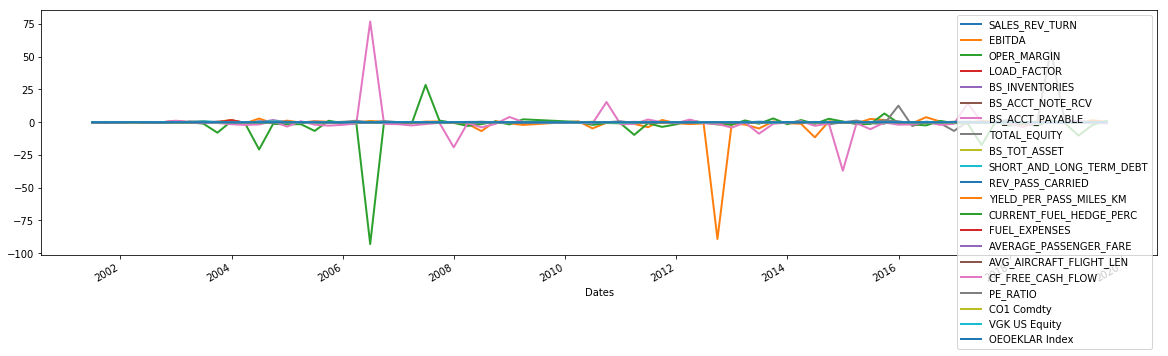

In [44]:
df_model = data
df_model.plot()

                labels
countries             
SALES_REV_TURN       3
EBITDA               1
OPER_MARGIN          1
LOAD_FACTOR          3
BS_INVENTORIES       3


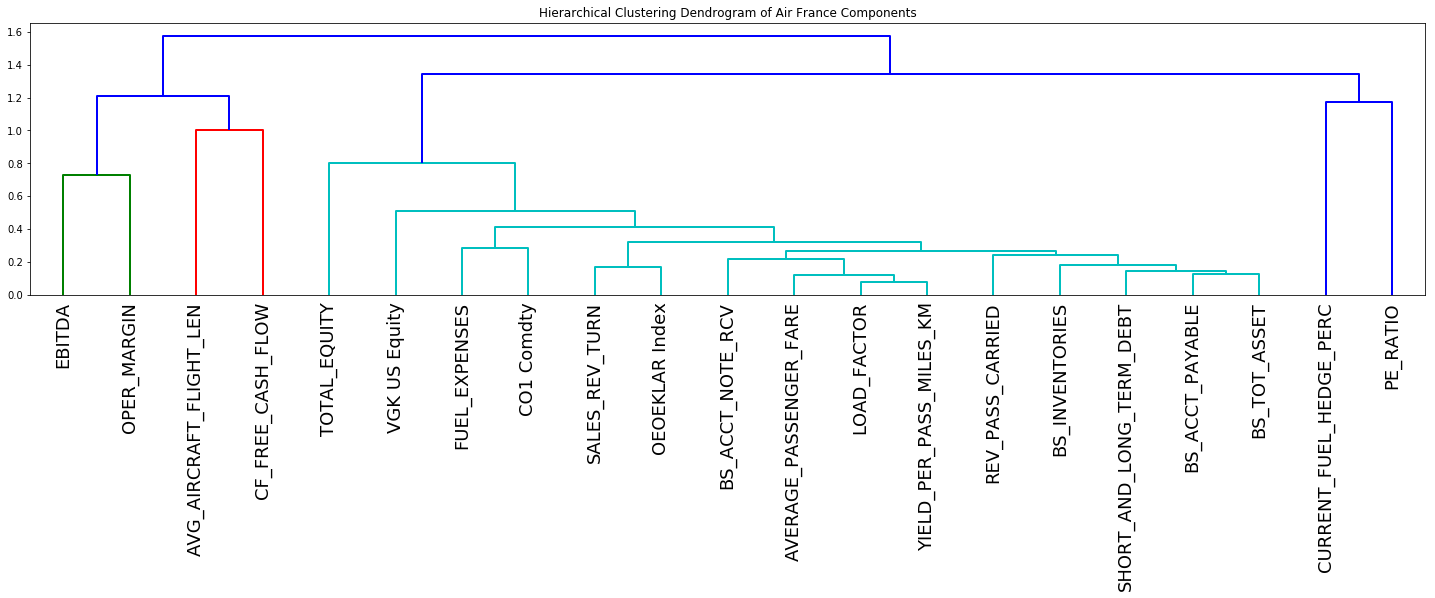

In [45]:
df_quadratic = df.resample('D').interpolate(method='quadratic')
x = df_quadratic.fillna(0).T

# Normalize the movements: normalized_movements
normalized_movements = normalize(x)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

labels = fcluster(mergings, 1.2, criterion='distance')
labels = pd.DataFrame({'labels':labels, 'countries':x.index}).set_index('countries')
print(labels.head())

# Plot the dendrogram
labelList = [i for i in x.index]

plt.figure(figsize=(25, 5))
plt.title('Hierarchical Clustering Dendrogram of Air France Components')
dendrogram(mergings,
           truncate_mode='level',
           leaf_rotation=90.,
           leaf_font_size=18.,
           labels=labelList,
           show_contracted=True)
plt.show();

In [46]:
y_names = ['FUEL_EXPENSES']
targets = targets = df_model[y_names]
y = df_model[y_names].dropna()

features_names_model = df_model.columns.drop(y_names).tolist()   
x_names = []

# df_model = df_model.drop(columns='Adj Close')   
features = (df_model[x_names]).pct_change().dropna()


feature_target_df = df_model[y_names + features_names_model].dropna()

__Test-Train split__

In [47]:
def buildLaggedFeatures(s,lag=2,dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res
    

features_lagged = buildLaggedFeatures(data[['CO1 Comdty']], lag=8, dropna=True)

In [48]:
features = features_lagged#.iloc[:,[1 ,2, 3]]
# features = features.join(features_lagged)

In [49]:
# linear_features = features[8:]
# targets_df = targets[8:]

# quarter = []
# trendline = []
# Q1 = []
# Q2 = []
# Q3 = []
# Q4 = []

# for i in linear_features.reset_index()['Dates']:
#     quarter.append(i.quarter)
    
# for i in range(len(quarter)): trendline.append(i)
# for i in quarter: Q1.append(1) if i == 1 else Q1.append(0)
# for i in quarter: Q2.append(1) if i == 2 else Q2.append(0)
# for i in quarter: Q3.append(1) if i == 3 else Q3.append(0)
# for i in quarter: Q4.append(1) if i == 4 else Q4.append(0)

# linear_features['trendline'] = trendline
# linear_features['Q1'] = Q1
# linear_features['Q2'] = Q2
# linear_features['Q3'] = Q3
# linear_features['Q4'] = Q4

In [50]:
linear_features = features[12:]
linear_features.iloc[[0,2,-2,-1],:]

,CO1 Comdty,CO1 Comdty_lag1,CO1 Comdty_lag2,CO1 Comdty_lag3,CO1 Comdty_lag4,CO1 Comdty_lag5,CO1 Comdty_lag6,CO1 Comdty_lag7,CO1 Comdty_lag8
Dates,,,,,,,,,
2006-06-30,0.402660,-0.200231,0.316332,0.106227,0.067266,0.014706,-0.040785,-0.010427,-0.086261
2006-12-29,0.148214,0.097746,0.402660,-0.200231,0.316332,0.106227,0.067266,0.014706,-0.040785
2019-06-28,-0.149844,-0.083260,0.232955,-0.026112,0.289441,0.014165,-0.206861,-0.241319,0.109904
2019-09-30,0.161075,-0.149844,-0.083260,0.232955,-0.026112,0.289441,0.014165,-0.206861,-0.241319


In [51]:
targets_df = targets[20:]
targets_df.iloc[[0,2,-2,-1],:]

,FUEL_EXPENSES
Dates,
2006-06-30,0.159587
2006-12-29,-0.075149
2019-06-28,0.169026
2019-09-30,0.077635


In [52]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
# linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * linear_features.shape[0])
train_features = X = linear_features[:train_size]
train_targets  = Y = targets_df[:train_size]
test_features  = x = linear_features[train_size:]
test_targets   = y = targets_df[train_size:]

print(linear_features.shape, train_features.shape, test_features.shape)

(51, 9) (40, 9) (11, 9)


In [53]:
# Create the linear model and complete the least squares fit
model = sm.OLS(Y, X)
results = model.fit()  # fit the model
print(results.summary(), results.pvalues.sort_values(ascending=True))
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0


# Make predictions from our model for train and test sets
train_predictions = Yhat = results.predict(X)
test_predictions = yhat = results.predict(x)
print(type(test_predictions))

                                 OLS Regression Results                                
Dep. Variable:          FUEL_EXPENSES   R-squared (uncentered):                   0.155
Model:                            OLS   Adj. R-squared (uncentered):             -0.090
Method:                 Least Squares   F-statistic:                             0.6325
Date:                Sat, 29 Feb 2020   Prob (F-statistic):                       0.761
Time:                        15:18:27   Log-Likelihood:                          31.570
No. Observations:                  40   AIC:                                     -45.14
Df Residuals:                      31   BIC:                                     -29.94
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [17]:
# Scatter the predictions vs the targets with 80% transparency
plt.figure(figsize=(20,10))
plt.scatter(Yhat, Y, alpha=0.8, color='b', label='train')
plt.scatter(yhat, y, alpha=0.8, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), color='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

def plot_test_train_results(model, Y, y, Yhat, yhat):
    Y_hat = pd.DataFrame(cross_val_predict(model, X, Y.values.ravel(), cv=10))
    y_hat = pd.DataFrame(cross_val_predict(model, x, y.values.ravel(), cv=10))
    Y_and_y = (Y.values.tolist()).append(y.values.tolist())
#     Yhat_and_yhat = (Yhat.values.tolist()).append(yhat.values.tolist())
    
    #Print results & comments
    print('Mean Y: ', np.mean(Y).round(3))
    print('Mean predictions: ', np.mean(Yhat).round(3))
    print()
    print('Score of model in sample:', model.score(X, Y).round(3))
    print('Score of model out-of-sample:',model.score(x, y).round(3))
    print()
    print("R² in sample: ", r2_score(Y, Y_hat).round(3))
    print("R² Out-of-sample: ", r2_score(y, y_hat).round(3))
    
    Yhat = Y.join(Y_hat.set_index(Y.index))
    Yhat.columns = [y_names[0], 'Forecast in-sample']
    yhat = y.join(y_hat.set_index(y.index))
    yhat.columns = [y_names[0], 'Forecast out-of-sample']
    
    
    ax = Yhat.plot()
    yhat.plot(ax=ax)
    labels = [y_names, 'Forecast -In-sample', y_names, 'Forecast -Out-of-sample', 'predictions using Random Forest model']
    plt.title('Model forecast, in-sample and out-of-sample results', fontsize=20)

NameError: name 'Yhat' is not defined

<Figure size 1440x720 with 0 Axes>

In [12]:
start = '2005'
end = '2019'

def plot_test_train_results(Y, y, Yhat, yhat):
    ax = Y.plot(figsize=(20,10))
    y.plot(ax=ax)
    Yhat.plot(ax=ax, label='Forecast -In-sample', legend='Yhat -In-sample')
    yhat.plot(ax=ax, label='Forecast -Out-of-sample', legend='yhat -Out-of-sample')
    plt.title('Model forecast, in-sample and out-of-sample results')
    

plot_test_train_results(Y, y, Yhat, yhat)
print("R² in sample: ", r2_score(Y, Yhat).round(3))
print("R² Out-of-sample: ", r2_score(y, yhat).round(3))

NameError: name 'Yhat' is not defined

In [115]:
p_values_individual_features = []

for i in (features.columns).tolist():
    p_invest_features = linear_features[[i]]

    # Create a size for the training set that is 85% of the total number of samples
    train_size = int(0.70 * p_invest_features.shape[0])
    train_features = X = linear_features[:train_size]
    train_targets  = Y = targets[:train_size]
    test_features  = x = linear_features[train_size:]
    test_targets   = y = targets[train_size:]

    model = sm.OLS(Y, X)
    results = model.fit()  # fit the model
    print(results.pvalues)
#     p_values_individual_features.append(results.pvalues)


(71, 2) (49, 2) (22, 2)
                            OLS Regression Results                            
Dep. Variable:      CF_FREE_CASH_FLOW   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.914
Date:                Mon, 24 Feb 2020   Prob (F-statistic):             0.0944
Time:                        12:30:07   Log-Likelihood:                -347.36
No. Observations:                  49   AIC:                             698.7
Df Residuals:                      47   BIC:                             702.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -117.5075    

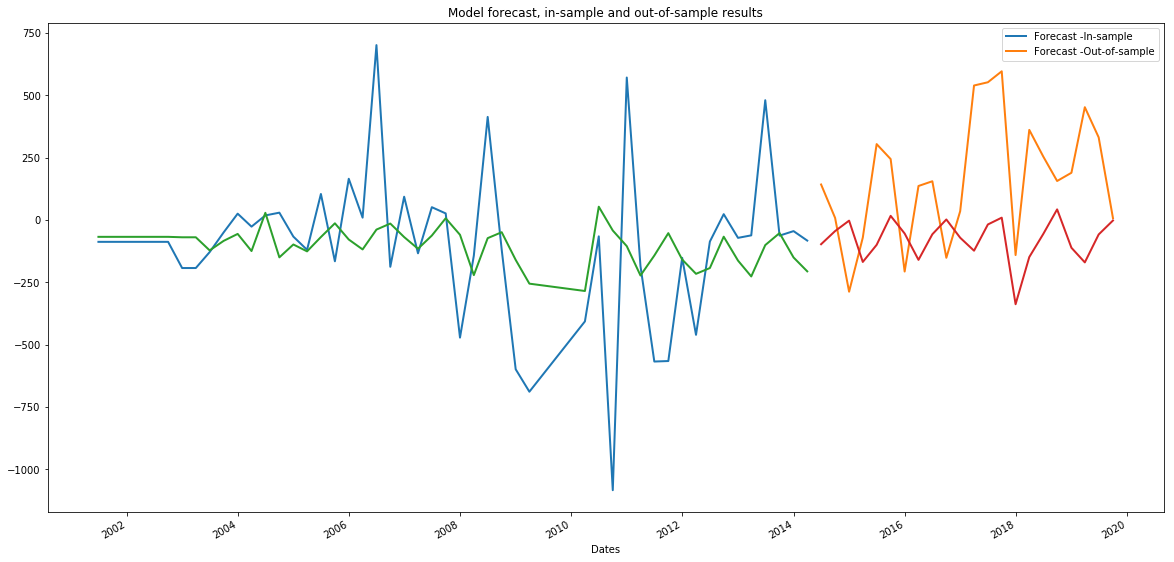

In [116]:
y_names = 'CF_FREE_CASH_FLOW'
targets = df_model[y_names]
y = df_model[y_names].dropna()

# df_model = df_model.drop(columns='Adj Close')
features_names_model = df_model.columns.drop(y_names).tolist()      
features = (df_model[['OPER_MARGIN']]).dropna()

y_names = ['CF_FREE_CASH_FLOW']

feature_target_df = df_model[y_names + features_names_model].dropna()


# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.70 * features.shape[0])
train_features = X = linear_features[:train_size]
train_targets  = Y = targets[:train_size]
test_features  = x = linear_features[train_size:]
test_targets   = y = targets[train_size:]

print(linear_features.shape, train_features.shape, test_features.shape)

# Create the linear model and complete the least squares fit
model = sm.OLS(Y, X)
results = model.fit()  # fit the model
print(results.summary(), results.pvalues.sort_values(ascending=True))
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0


# Make predictions from our model for train and test sets
train_predictions = Yhat = results.predict(X)
test_predictions = yhat = results.predict(x)

plot_test_train_results(Y, y, Yhat, yhat)

In [117]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, Y):
    # Perform Grid-Search
    gsc = GridSearchCV(
       estimator=RandomForestRegressor(),
       param_grid={
           'max_depth': range(2,5),
           'n_estimators': (50, 75, 100, 150)},
       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, Y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, Y, cv=5, scoring='neg_mean_absolute_error')

    return scores

rfr_model(X,Y)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([-145.09581242, -119.72598486, -278.63344149, -451.9785741 ,
       -199.21261108])

In [118]:
# Exrtract features importance with built-in function of random forest regressor
features_importances = rfr.feature_importances_

# Sort the index that will be our reference for the positino of each index regarding there importances
sorted_index = np.argsort(features_importances)[::-1]

# Create the corresponding labels to importances position
features_count = range(len(sorted_index))
labels = np.array(linear_features.columns.to_list())[sorted_index]

def map_importance(model):   
    # Plot the graph
    plt.bar(features_count, features_importances[sorted_index], tick_label=labels)
    plt.xticks(rotation=90)
    plt.show()

mpl.rcParams['figure.figsize'] = 20 , 5

IndexError: index 3 is out of bounds for axis 0 with size 2

In [ ]:
def plot_test_train_results(model, Y, y, Yhat, yhat):
    Y_hat = pd.DataFrame(cross_val_predict(model, X, Y.values.ravel(), cv=10))
    y_hat = pd.DataFrame(cross_val_predict(model, x, y.values.ravel(), cv=10))
    Y_and_y = (Y.values.tolist()).append(y.values.tolist())
#     Yhat_and_yhat = (Yhat.values.tolist()).append(yhat.values.tolist())
    
    #Print results & comments
    print('Mean Y: ', np.mean(Y).round(3))
    print('Mean predictions: ', np.mean(Yhat).round(3))
    print()
    print('Score of model in sample:', model.score(X, Y).round(3))
    print('Score of model out-of-sample:',model.score(x, y).round(3))
    print()
    print("R² in sample: ", r2_score(Y, Y_hat).round(3))
    print("R² Out-of-sample: ", r2_score(y, y_hat).round(3))
    
    Yhat = Y.join(Y_hat.set_index(Y.index))
    Yhat.columns = [y_names[0], 'Forecast in-sample']
    yhat = y.join(y_hat.set_index(y.index))
    yhat.columns = [y_names[0], 'Forecast out-of-sample']
    
    
    ax = Yhat.plot()
    yhat.plot(ax=ax)
    labels = [y_names, 'Forecast -In-sample', y_names, 'Forecast -Out-of-sample', 'predictions using Random Forest model']
    plt.title('Model forecast, in-sample and out-of-sample results', fontsize=20)

map_importance(rfr)
plot_test_train_results(rfr, Y, y, Yhat, yhat)